

# Handwritten Digits Recognition using Support Vector Machine


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist_train=pd.read_csv("mnist_train.csv")
mnist_test=pd.read_csv("mnist_test.csv")

In [3]:
# Dimensions
print("Shape of Training Dataset: ", mnist_train.shape)
print("Shape of Test dataset: ", mnist_test.shape)

Shape of Training Dataset:  (60000, 785)
Shape of Test dataset:  (10000, 785)


In [4]:
mnist_train.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_test.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# MNIST dataset description
mnist_train.describe()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [7]:
mnist_test.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# information about the MNIST dataset such as datatypes
mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [10]:
# there are no missing values in the dataset 
mnist_train.isnull().sum().head(10)

label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64

In [11]:
mnist_test.isnull().sum().head(10)

label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64

In [12]:
# Printing columns
print(mnist_train.columns)
print(mnist_test.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [13]:
order=list(np.sort(mnist_train['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

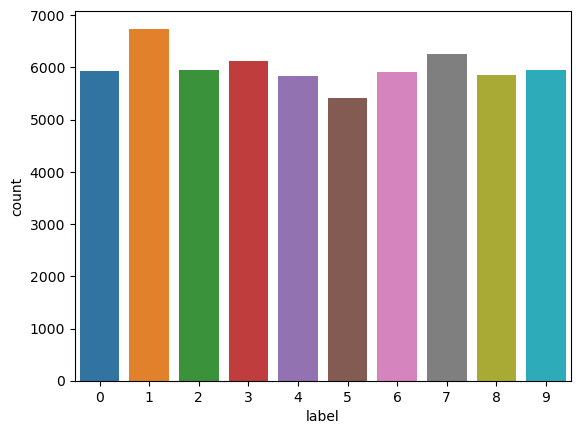

In [14]:
## Visualizing the number of class and counts in the datasets
import seaborn as sns
sns.countplot(mnist_train['label'])

Text(0.5, 1.0, 'Digit 4')

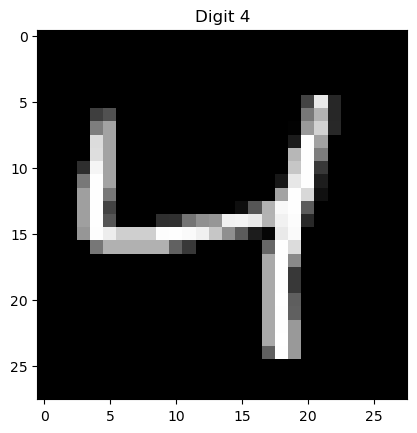

In [15]:
# Plotting some samples as well as converting into matrix

four = mnist_train.iloc[2, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 2')

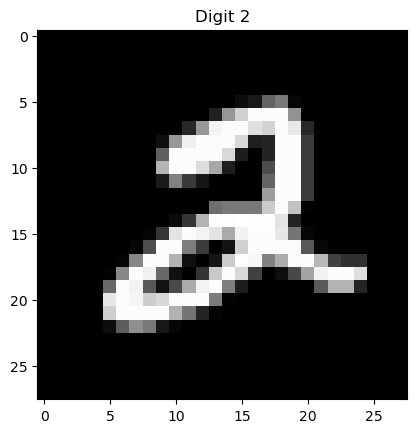

In [16]:
two = mnist_train.iloc[5, 1:]
two.shape
two = two.values.reshape(28,28)
plt.imshow(two, cmap='gray')
plt.title("Digit 2")

In [17]:
# Data preparation
round(mnist_train.drop('label', axis=1).mean(),2)

1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Length: 784, dtype: float64

In [18]:
# separating X variable and Y variable

x=mnist_train.drop(columns='label')

y=mnist_train['label']

print(mnist_train.shape)

(60000, 785)


In [19]:
# Normalization

x=x/255.0
mnist_test=mnist_test/255.0

print('x: ', x.shape)
print('mnist_test: ', mnist_test.shape)

x:  (60000, 784)
mnist_test:  (10000, 785)


In [20]:
# feature scaling

from sklearn.preprocessing import scale
x=scale(x)

In [21]:
# spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)

In [22]:
# Model: SUPPORT VECTOR MACHINE USING RBF

In [45]:
from sklearn.svm import SVC
model_svc=SVC(kernel='rbf', C=10, gamma=0.001)
model_svc.fit(x_train, y_train)

SVC(C=10, gamma=0.001)

In [46]:
# Evaluate the model on the test set and print additional metrics
prediction_1=model_svc.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of Linear SVM Model: ", accuracy_score(y_test, prediction_1)*100)

Accuracy of Linear SVM Model:  96.94444444444444


In [47]:
prediction_1

array([3, 5, 0, ..., 0, 3, 5], dtype=int64)

In [50]:
#Comparing Predicted and actual values
print("Predictad Values :\n ",prediction_1[10:15])
print ("Actual Values :\n",y_test[10:15])

Predictad Values :
  [2 0 1 4 7]
Actual Values :
 56040    2
38816    0
6682     1
17769    4
47682    7
Name: label, dtype: int64


In [51]:
# Classification Report of linear model
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1772
           1       0.98      0.99      0.99      1992
           2       0.95      0.97      0.96      1831
           3       0.97      0.96      0.96      1834
           4       0.97      0.97      0.97      1772
           5       0.97      0.96      0.96      1652
           6       0.98      0.98      0.98      1757
           7       0.95      0.97      0.96      1964
           8       0.98      0.96      0.97      1724
           9       0.97      0.96      0.96      1702

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000



In [52]:
# confusion matrix of linear svm model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_1))

[[1744    0    5    2    0    4    7    6    3    1]
 [   1 1965    9    4    2    1    0    7    2    1]
 [   3    5 1778   13    5    3    4   17    2    1]
 [   0    0   21 1752    2   22    1   18   14    4]
 [   1    4   15    1 1710    4    4    7    1   25]
 [   4    2    5   21    3 1578   12   11    9    7]
 [   6    2    9    0    3    5 1726    4    2    0]
 [   2    7   13    3   15    1    0 1908    1   14]
 [   5    8   13   13    3   10    8    6 1652    6]
 [   1    2    7    6   16    5    0   22    6 1637]]


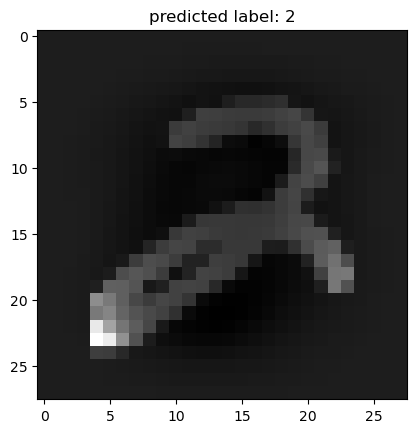

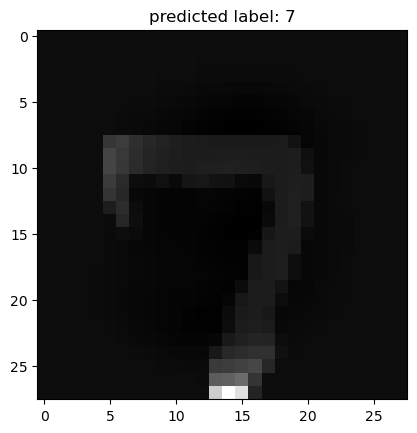

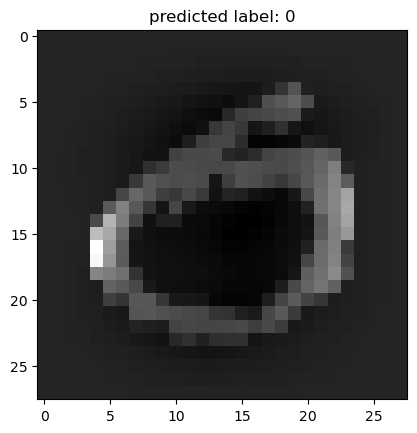

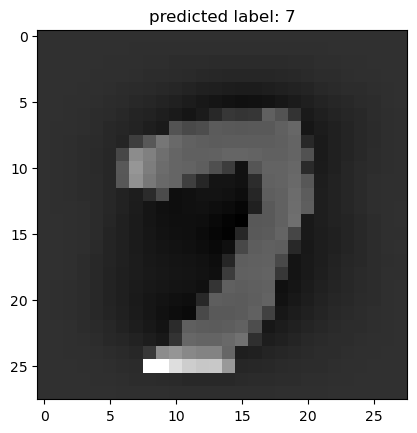

In [54]:
# Prediction Of x_test

for i in (np.random.randint(0,270,4)):         
    two_d = (np.reshape(x_test[i], (28, 28)))
    plt.title('predicted label: {0}'. format(prediction_1[i]))
    plt.imshow(two_d, cmap='gray') 
    plt.show()

In [56]:
# Save the trained model to a file
import joblib
joblib.dump(model_svc, 'svm_model.pkl')

['svm_model.pkl']